In [1]:
#select which simuation folder to analyze
folder='resCAM0'

In [ ]:
# ramachandran plot not used
"""import numpy as np
import matplotlib.pyplot as plt
folder = 'resCAM7'
cmap = plt.get_cmap('plasma')

# Iterate over files from aa1 to aa11
for i in range(1, 12):
    filename = f'../{folder}/aa{i}.dat'
    name = f'aa{i}'
    time, cv1_radians, cv2_radians = np.loadtxt(filename, comments='#', unpack=True)

    cv1_degrees = np.degrees(cv1_radians)
    cv2_degrees = np.degrees(cv2_radians)

    hist, xedges, yedges = np.histogram2d(cv1_degrees, cv2_degrees, bins=100, range=[[-180, 180], [-180, 180]])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))

    #Plot
    plt.imshow(hist.T, extent=extent, origin='lower', cmap=cmap, aspect='auto')

    cbar = plt.colorbar()
    cbar.set_label('Density')
    plt.xlabel('cv1 ($\phi$) in degrees')
    plt.ylabel('cv2 ($\psi$) in degrees')
    plt.title(f'Ramachandran Heatmap for {name}')

    plt.show()"""

c:\Users\99alb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


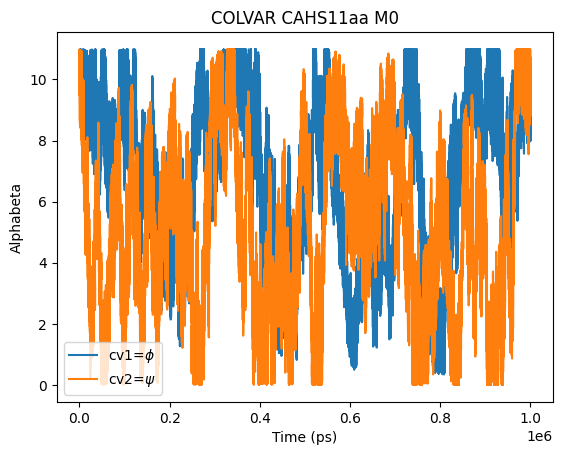

In [2]:
import matplotlib.pyplot as plt

# open the metadynamics result folder of your chosing 
with open(f'{folder}/COLVAR', 'r') as f:  #  resCOM0, resCOM7, resCAM0, resCAM7
 lines = f.readlines()[5:] #do not read header lines
 
 #create lists of the data column consisting of time and CVs
 time = [float(line.split()[0]) for line in lines]
 cv1 = [float(line.split()[1]) for line in lines]
 cv2 = [float(line.split()[2]) for line in lines]
f.close() 

#plotting function
fig, ax = plt.subplots()
ax.set(xlabel='Time (ps)', ylabel='')
plt.plot(time, cv1, label='cv1=$\phi$') #cv1=$\phi$ AlphaRMSD
plt.plot(time, cv2, label='cv2=$\psi$')
plt.ylabel("Alphabeta")
plt.title(f'COLVAR CAHS11aa M0')
ax.legend()
plt.show()


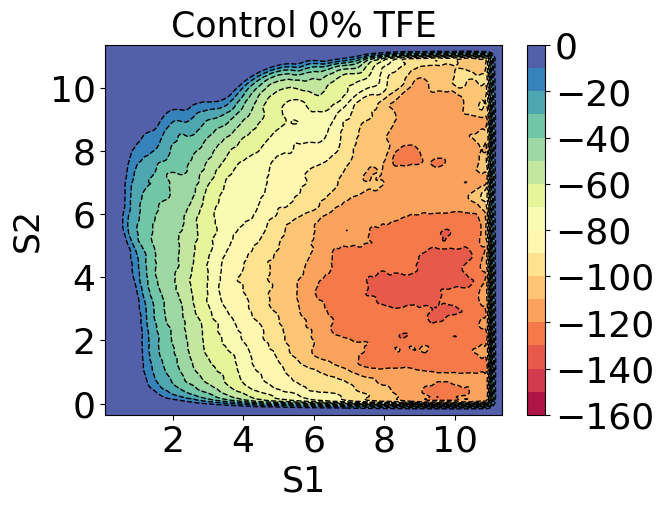

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load data 
data = np.genfromtxt(f'../{folder}/fes.dat', comments='#') 

#extract x, y, and free energy from the columns
x = data[:, 0]
y = data[:, 1]
gradient = data[:, 2]

#reshape them into a 2D matrix
dim_x = len(np.unique(x))
dim_y = len(np.unique(y))
x = np.reshape(x, (dim_y, dim_x))
y = np.reshape(y, (dim_y, dim_x))
gradient = np.reshape(gradient, (dim_y, dim_x))
#scaling
gradient_limit = -160
color_levels = np.linspace(gradient_limit, 0, 17)

#contour plot 
contour = plt.contourf(x, y, gradient, cmap=sns.color_palette('Spectral', as_cmap=True), levels=color_levels)
contour_lines = plt.contour(x, y, gradient, colors='black', levels=np.linspace(gradient_limit, 0, 17), linewidths=1)
plt.xlabel('S1', fontsize=25)
plt.ylabel('S2', fontsize=25)
plt.title("Control 0% TFE", fontsize=25, color = 'black') # CAHS11aa 70% TFE Control 70% TFE ##############################
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
cbar = plt.colorbar(contour)
#cbar.set_label('A (kJ/mol)', fontsize=14)
cbar.mappable.set_clim(gradient_limit, 0)
cbar.ax.tick_params(labelsize=26)

plt.show()



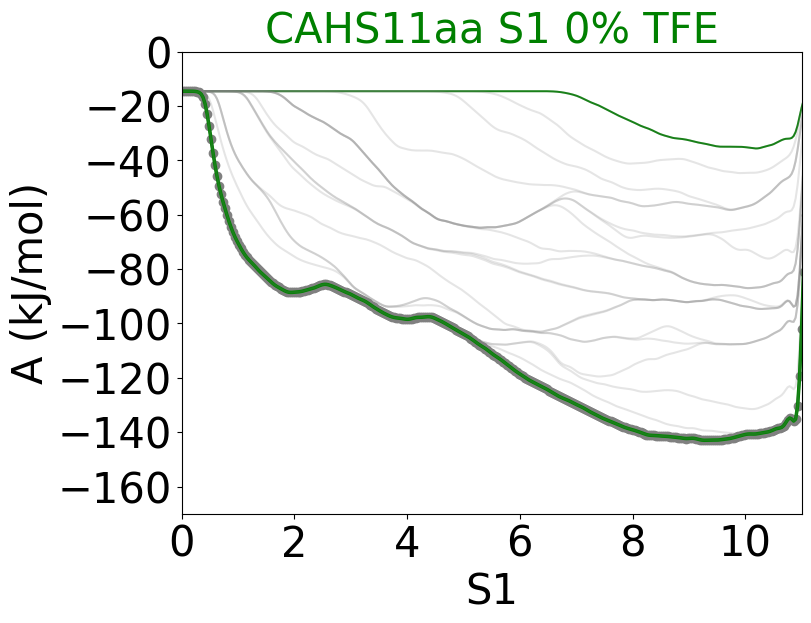

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#plot
plt.figure(figsize=(8, 6))

for i in range(21):
    fesdata = np.genfromtxt(f'../{folder}/ab1/fes_{i}.dat', comments='#')
    fesdata = fesdata[:, 0:2]
    
    #set line color based on the order, the first line and the last two are highlighted to see the convergence
    if i == 0:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='green', linewidth=1.4, label=f"fes_{i}")
    if i == 20:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='green', linewidth=2.5, label=f"fes_{i}")
    if i == 19:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='grey', linewidth =2,marker='o')
    else:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='gray', alpha=0.2, label=f"fes_{i}")

#plotting
plt.xlabel('S1', fontsize=30)
plt.ylabel('A (kJ/mol)', fontsize=30)
plt.xlim(0, 11)
plt.title("CAHS11aa S1 0% TFE", fontsize=30, color='green') #change 0% or 70% based on what you are analyzing
plt.xticks(fontsize=30)
plt.ylim(-170,0)
plt.yticks(fontsize=30)
plt.show()
plt.figure(figsize=(8, 6))

    

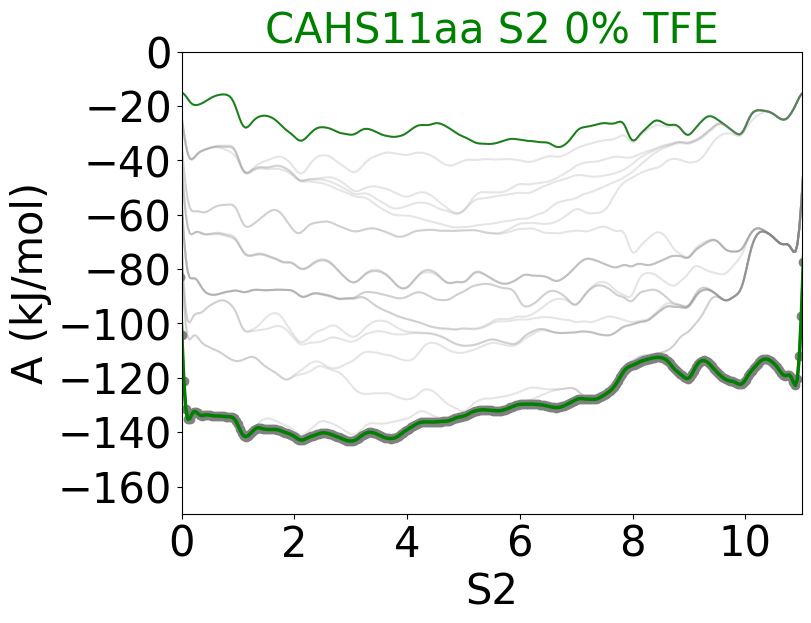

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# same code as before but for the second CV
plt.figure(figsize=(8, 6))

for i in range(21):
    fesdata = np.genfromtxt(f'../{folder}/ab2/fes_{i}.dat', comments='#')
    fesdata = fesdata[:, 0:2]
    if i == 0:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='green', linewidth=1.4, label=f"fes_{i}")
    if i == 19:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='grey', linewidth =2,marker='o')
    
    if i == 20:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='green', linewidth=2.5, label=f"fes_{i}")
    else:
        plt.plot(fesdata[:, 0], fesdata[:, 1], color='gray', alpha=0.2, label=f"fes_{i}")

plt.xlabel('S2', fontsize=30)
plt.ylabel('A (kJ/mol)', fontsize=30)
plt.xlim(0, 11)
plt.xticks(fontsize=30)
plt.ylim(-170,0)
plt.yticks(fontsize=30)
plt.title("CAHS11aa S2 0% TFE", fontsize=30, color='green') 
plt.show()
plt.figure(figsize=(8, 6))




In [1]:
import numpy as np
beta=-1/(0.008314*300)
list_int=[]
#integration function
def doubleint(peptide,window):
    data = np.genfromtxt(f'../{peptide}/fes.dat', comments='#') 
    #extract columns
    x = data[:, 0]
    y = data[:, 1]
    freeE=data[:,2]
    #create a 2D matrix
    dim_x = len(np.unique(x))
    dim_y = len(np.unique(y))

    dpx=np.unique(x)
    dpy=np.unique(y)

    z = np.reshape(freeE, (dim_y, dim_x))
    
    valx=len(dpx)
    valy=len(dpy)
    nominator=0
    denominator=0
    #for loops for the integration, calculating nominator and denominator 
    for i in range(1,valx):
        #range based on the windowsize, calculate delta S based on the difference between two CV values of S1
        delta_x=dpx[i]-dpx[i-1]

        for j in range(1,valy):
            #range based on the windowsize, calculate delta S based on the difference between two CV values of S2
            delta_y=dpy[j]-dpy[j-1]
            #based on window size include or exclude points
            if dpx[i]>=window and dpy[j]>=window and dpx[i]<=11 and dpy[j]<=11:
                #trapezoid integration using the formula on the report
                trapezoid = ( np.exp(beta*z[j-1,i]) + np.exp(beta*z[j-1,i-1]) + np.exp(beta*z[j,i-1]) + np.exp(beta*z[j,i]) ) * delta_x * delta_y * 0.25
                #summing to calcualte the nominator
                nominator += trapezoid
            elif dpx[i]>11 and dpy[j]>11:
                continue
            else:
                #same formula for denominator
                trapezoid = ( np.exp(beta*z[j-1,i]) + np.exp(beta*z[j-1,i-1]) + np.exp(beta*z[j,i-1]) + np.exp(beta*z[j,i]) ) * delta_x * delta_y * 0.25
                #trapezoid =  (np.exp(beta*0.25*(z[j-1,i] + z[j-1,i-1] + z[j,i-1] + z[j,i])))  * delta_x * delta_y
                denominator += trapezoid
    #calculate the double integration division result
    res = -0.008314*300*(np.log((nominator/denominator)))
    return res

#use every folder
for j in ['resCOM0', 'resCOM7', 'resCAM0', 'resCAM7']:
    new_list=[]
    #calculate for each
    for i in np.arange(6,11,0.5):    
        new_list.append(doubleint(j,i))
    list_int.append(new_list)
print(list_int)

[[13.97803839714965, 14.433905758137142, 14.662351523089551, 14.96280849988747, 17.42460275185909, 18.9895447235736, 21.294742489951354, 24.07484484704793, 35.046006886243184, 37.62319720484541], [9.376655835894065, 9.71882363520875, 10.071505612629352, 11.58276084213474, 15.363607732740038, 18.749269859323583, 21.347430168281594, 25.24654808063107, 39.01962168190843, 44.26456532886121], [13.53404307032565, 14.634180095127599, 17.418694348195267, 21.130789716556478, 22.857490531225178, 22.916746981491084, 23.218108105766696, 23.485763135279413, 25.634897092416082, 29.884097062229266], [10.214053595887817, 10.76471616299914, 12.04765541610677, 12.852294490438952, 12.955924987682852, 13.009800598925688, 13.697520703861489, 14.107407357741344, 19.322842796196877, 39.00632244156432]]


In [16]:
'''import seaborn as sns
palette = sns.color_palette('husl',4)
#'resCOM0', 'resCOM7', 'resCAM0', 'resCAM7'
# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(35, 6))
labels = ['ControlM0', 'ControlM7', 'CAHSM0', 'CAHSM7']
# Plotting each position
for i in range(10):
    # Extract values for each position from internal lists
    values = [lst[i] for lst in list_int]
    
    # Plot the values for the current position
    bars = axs[i].bar(labels, values, color=palette)
    axs[i].set_ylim(0, 45)
    for j,(bar, value) in enumerate(zip(bars, values)):
        formatted_value = "{:.4}".format(value)
        axs[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(),formatted_value, ha='center', va='bottom', fontsize=13)

axs[0].set_title('from 6 to 11', fontsize=16)
axs[1].set_title('from 6.5 to 11', fontsize=16)
axs[2].set_title('from 7 to 11', fontsize=16)
axs[3].set_title('from 7.5 to 11', fontsize=16)
axs[4].set_title('from 8 to 11', fontsize=16)
axs[5].set_title('from 8.5 to 11', fontsize=16)
axs[6].set_title('from 9 to 11', fontsize=16)
axs[7].set_title('from 9.5 to 11', fontsize=16)
axs[8].set_title('from 10 to 11', fontsize=16)
axs[9].set_title('from 10.5 to 11', fontsize=16)
fig.text(0.09, 0.5, r'$\Delta$ G', va='center', rotation='vertical', fontsize=16)
for ax in axs:
    ax.tick_params(axis='x',rotation=30, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

plt.show()'''

'import seaborn as sns\npalette = sns.color_palette(\'husl\',4)\n#\'resCOM0\', \'resCOM7\', \'resCAM0\', \'resCAM7\'\n# Create subplots\nfig, axs = plt.subplots(1, 10, figsize=(35, 6))\nlabels = [\'ControlM0\', \'ControlM7\', \'CAHSM0\', \'CAHSM7\']\n# Plotting each position\nfor i in range(10):\n    # Extract values for each position from internal lists\n    values = [lst[i] for lst in list_int]\n    \n    # Plot the values for the current position\n    bars = axs[i].bar(labels, values, color=palette)\n    axs[i].set_ylim(0, 45)\n    for j,(bar, value) in enumerate(zip(bars, values)):\n        formatted_value = "{:.4}".format(value)\n        axs[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(),formatted_value, ha=\'center\', va=\'bottom\', fontsize=13)\n\naxs[0].set_title(\'from 6 to 11\', fontsize=16)\naxs[1].set_title(\'from 6.5 to 11\', fontsize=16)\naxs[2].set_title(\'from 7 to 11\', fontsize=16)\naxs[3].set_title(\'from 7.5 to 11\', fontsize=16)\naxs[4].set_title(\'from 

C:\Users\99alb\AppData\Local\Temp\ipykernel_17780\2905761446.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(range(0,46,10),fontsize=30)
C:\Users\99alb\AppData\Local\Temp\ipykernel_17780\2905761446.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(range(0,46,10),fontsize=30)
C:\Users\99alb\AppData\Local\Temp\ipykernel_17780\2905761446.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(range(0,46,10),fontsize=30)
C:\Users\99alb\AppData\Local\Temp\ipykernel_17780\2905761446.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(range(0,46,10),fontsize=30)


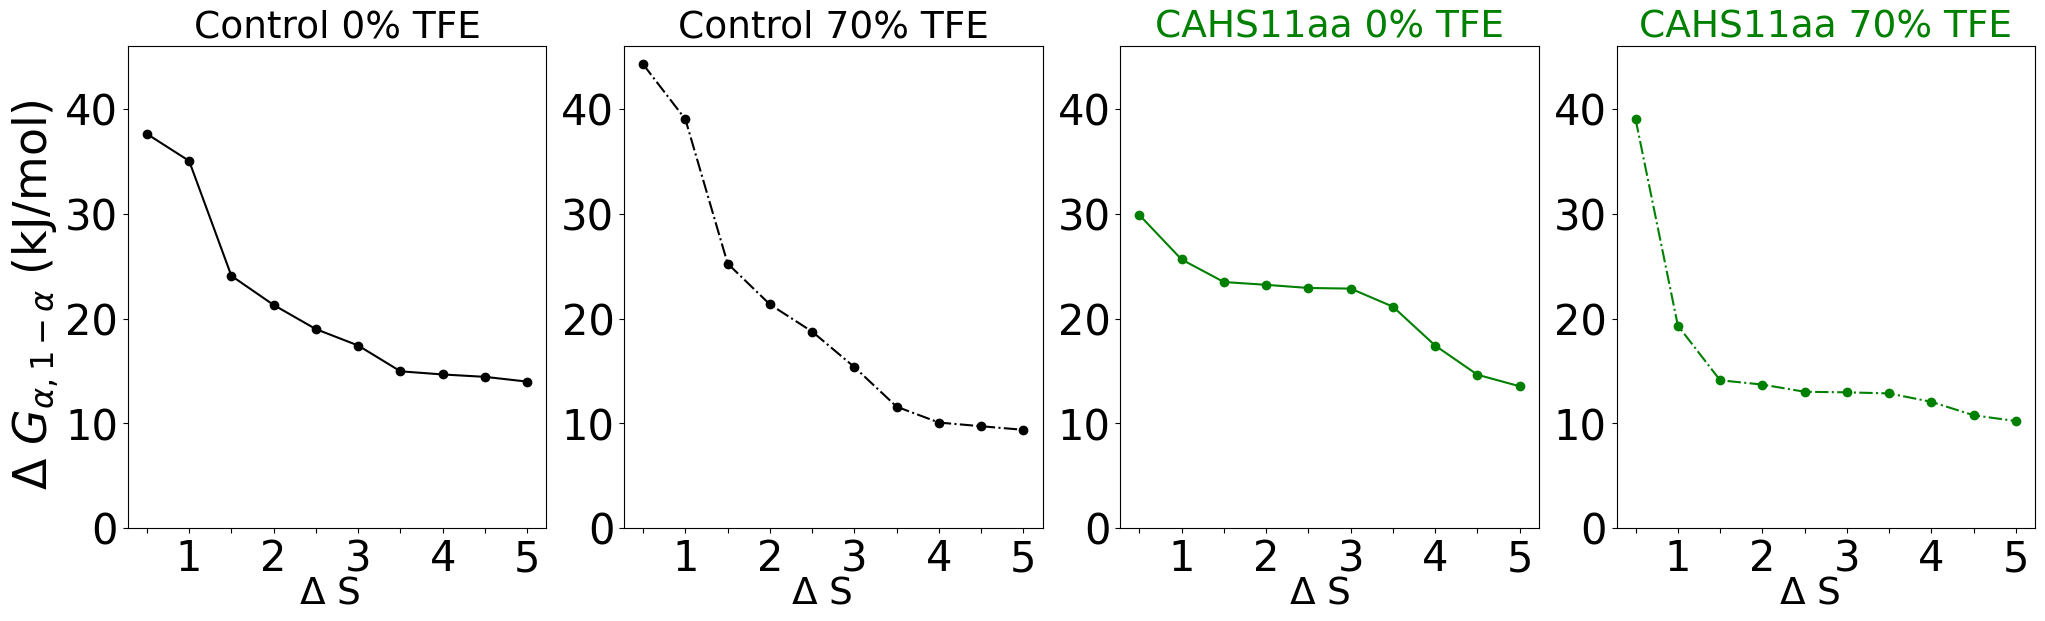

In [17]:
import matplotlib.pyplot as plt


# Create subplots for each folder
fig, axs = plt.subplots(1, len(list_int), figsize=(20, 6))
colour = ['black','black','green','green']
lines = ['solid','dashdot','solid','dashdot']
# Plotting each list
for i, (inner_list, colour,lines) in enumerate(zip(list_int, colour,lines)):
    reversed_inner_list = inner_list[::-1]  #reverse the inner list
    axs[i].plot(reversed_inner_list, marker='o', color=colour,linestyle=lines)
    axs[i].set_title(f'Plot {i + 1}')
    axs[i].set_xticks(range(len(inner_list)))
    axs[i].set_xticklabels(["",1,"",2,"",3,"",4,"",5], fontsize=30) # this is stupid I know, but so I am
    axs[i].set_ylim(0,46)
    axs[i].set_yticklabels(range(0,46,10),fontsize=30)    
axs[0].set_title('Control 0% TFE', fontsize=27)
axs[1].set_title('Control 70% TFE', fontsize=27)
axs[2].set_title('CAHS11aa 0% TFE', fontsize=27, color = 'green')
axs[3].set_title('CAHS11aa 70% TFE', fontsize=27,color = 'green')
fig.text(-0.02, 0.5, r'$\Delta$ $G_{α,1-α}$ (kJ/mol)', va='center', rotation='vertical', fontsize=33)
fig.text(0.14, 0.003, r'$\Delta$ S', ha='center', va='center', fontsize=27)
fig.text(0.386, 0.003, r'$\Delta$ S', ha='center', va='center', fontsize=27)
fig.text(0.635, 0.003, r'$\Delta$ S', ha='center', va='center', fontsize=27)
fig.text(0.88, 0.003, r'$\Delta$ S', ha='center', va='center', fontsize=27)
plt.tight_layout()
plt.show()

